In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
import keras
from keras import Sequential
from keras.layers import SimpleRNN
from keras import models
from keras import layers
from keras.layers import Dropout
from keras.models import Sequential
import tensorflow as tf
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.regularizers import l1
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

from keras import regularizers

In [4]:
Total_Y_data = pd.read_csv("X_data.csv")
Total_X_data = pd.read_csv("Y_data_voltage.csv")

Total_Y_data.drop("Unnamed: 0", axis=1, inplace=True)
Total_X_data.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
Total_Y_data

,V_myo(um3),V_SR(um3),V_myo_uL(uL),V_SR_uL(uL),i_NaK_max(uA),K_m_K(mM),K_m_Na(mM),K_o(millimolar),Na_o(millimolar),Ca_TRPN_Max(mM),g_Na(microS),g_t(microS),a_endo,b_endo,g_ss(microS),g_K1(microS),g_f(microS),f_Na,g_B_Na(microS),g_B_Ca(microS),g_B_K(microS),E_Ca(millivolt),Ca_o(millimolar),g_D(um3_per_ms),J_R(um3_per_ms),J_L(um3_per_ms),N,K_mNa(mM),K_mCa(mM),eta,k_sat,g_NCX(mM_per_ms),g_SERCA(mM_per_ms),K_SERCA(mM),g_pCa(mM_per_ms),K_mpCa(mM),g_CaB(mM_per_mV_ms),g_SRl(per_ms),k_CMDN(mM),B_CMDN(mM),k_on(per_mM_per_ms),k_Ref_off(per_ms),gamma_trpn,alpha_0(per_ms),alpha_r1(per_ms),alpha_r2(per_ms),n_Rel,K_z,n_Hill,Ca_50ref(mM),z_p,beta_1,beta_0,T_ref(N_per_mm2),a in component Cross_Bridges,A_1,A_2,A_3,alpha_1(per_ms),alpha_2(per_ms),alpha_3(per_ms),V_L(mV),del_VL(mV),phi_L,t_L(ms),tau_L(ms),tau_R(ms),phi_R,theta_R,K_RyR(mM),K_L(mM),a,b,c,d,tau_s_ss
0,18087.633040,2971.250703,0.000033,0.000003,0.000103,1.634672,8.457044,6.694638,184.384591,0.083447,0.943460,0.035996,0.398748,0.367971,0.006301,0.023025,0.001178,0.101475,0.000052,0.000037,0.000189,50.378929,0.912795,0.063656,0.028554,0.000638,29033.551274,67.725076,1.085710,0.212287,0.094548,0.045182,0.000432,0.000601,0.000003,0.000726,3.577211e-08,0.000012,0.002797,0.061828,54.703623,0.122116,2.809838,0.009072,0.002374,0.000876,3.616333,0.188943,4.247229,0.000591,0.994816,-4.506566,3.837668,69.613973,0.485194,-31.005231,183.081552,84.382845,0.027666,0.136102,0.906774,-2.644113,6.127889,2.776715,1.202394,893.730844,2.491605,0.069589,0.008294,0.029984,0.000162,0.085792,19.130331,0.012273,123.013407,2.363106
1,35119.155518,2546.504451,0.000024,0.000001,0.000080,1.266706,7.810010,3.160808,112.247246,0.101991,0.873344,0.033241,0.840158,0.419822,0.005810,0.019431,0.000894,0.129981,0.000100,0.000022,0.000203,77.398315,1.273687,0.091899,0.028506,0.000713,48068.129504,86.484521,1.179412,0.241322,0.061292,0.048726,0.000491,0.000525,0.000003,0.000378,2.439642e-08,0.000028,0.002396,0.031686,148.035907,0.270115,2.130209,0.004325,0.002281,0.002287,3.098222,0.176333,1.720766,0.000746,0.479735,-2.144745,3.374904,39.436246,0.242832,-37.055382,77.068914,163.237275,0.033940,0.165306,0.898471,-2.777012,8.826759,2.609261,0.828769,760.785799,1.776488,0.073601,0.010835,0.037541,0.000160,0.069981,17.626720,0.009399,76.115827,2.312663
2,31723.880665,1163.450863,0.000018,0.000002,0.000052,1.955174,9.439872,3.730495,149.609915,0.088179,0.427102,0.051464,0.541589,0.294336,0.005527,0.032682,0.001876,0.131524,0.000115,0.000018,0.000144,63.824791,0.960379,0.041408,0.019436,0.000844,36760.361016,129.362895,1.567416,0.415073,0.076082,0.047526,0.000574,0.000697,0.000002,0.000395,3.902071e-08,0.000023,0.001901,0.034382,57.967900,0.261788,2.841805,0.007619,0.002156,0.001304,1.927688,0.215191,3.876491,0.001180,0.689346,-3.254414,2.520540,51.385288,0.382186,-18.549011,154.117366,94.889238,0.039312,0.067920,0.766250,-1.977765,6.814161,2.093193,1.398835,641.688994,3.528071,0.074748,0.007420,0.058981,0.000150,0.067458,11.149554,0.011840,87.480619,2.113083
3,17885.692846,3043.770618,0.000022,0.000003,0.000125,0.971169,6.645655,4.763852,74.651845,0.069008,1.186931,0.051356,0.508838,0.267433,0.004183,0.016378,0.000872,0.217301,0.000077,0.000048,0.000191,83.989147,1.073941,0.093631,0.022058,0.000796,35813.754983,77.915364,1.183638,0.317736,0.096556,0.021336,0.000300,0.000704,0.000002,0.000336,2.190880e-08,0.000021,0.002133,0.046351,104.319744,0.139568,2.218931,0.005965,0.002652,0.002351,4.334115,0.134191,4.066621,0.001353,0.580554,-3.842275,7.205187,74.265184,0.214581,-36.520512,188.191449,183.787629,0.020841,0.194512,0.357368,-1.225460,10.145411,2.740481,0.851633,798.744010,1.640167,0.068951,0.009030,0.042338,0.000288,0.093335,9.438720,0.013712,72.067875,2.977916
4,30331.086522,2278.322744,0.000038,0.000003,0.000069,1.539212,9.291735,2.934818,167.996222,0.103373,0.838384,0.024628,0.394305,0.420007,0.005825,0.023415,0.001802,0.241262,0.000071,0.000018,0.000115,68.291056,1.014535,0.067958,0.020678,0.000955,61319.601263,59.46208

In [6]:
#Total_Y_data = Total_Y_data.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 36, 38, 39, 40, 41, 42, 49, 55, 56, 57, 61, 62, 63, 64, 65, 67, 68, 69, 70, 75]]

In [7]:
# Total_Y_data = Total_Y_data[['V_myo(um3)',
#   'N',
# 'g_D(um3_per_ms)',
# 'K_L(mM)',

# 'V_myo_uL(uL)',
#   'del_VL(mV)',
# 'tau_L(ms)',
# 'phi_L',
# 'g_t(microS)',
# 'K_RyR(mM)']]

In [8]:
Total_Y_data

,V_myo(um3),V_SR(um3),V_myo_uL(uL),V_SR_uL(uL),i_NaK_max(uA),K_m_K(mM),K_m_Na(mM),K_o(millimolar),Na_o(millimolar),Ca_TRPN_Max(mM),g_Na(microS),g_t(microS),a_endo,b_endo,g_ss(microS),g_K1(microS),g_f(microS),f_Na,g_B_Na(microS),g_B_Ca(microS),g_B_K(microS),E_Ca(millivolt),Ca_o(millimolar),g_D(um3_per_ms),J_R(um3_per_ms),J_L(um3_per_ms),N,K_mNa(mM),K_mCa(mM),eta,k_sat,g_NCX(mM_per_ms),g_SERCA(mM_per_ms),K_SERCA(mM),g_pCa(mM_per_ms),K_mpCa(mM),g_CaB(mM_per_mV_ms),g_SRl(per_ms),k_CMDN(mM),B_CMDN(mM),k_on(per_mM_per_ms),k_Ref_off(per_ms),gamma_trpn,alpha_0(per_ms),alpha_r1(per_ms),alpha_r2(per_ms),n_Rel,K_z,n_Hill,Ca_50ref(mM),z_p,beta_1,beta_0,T_ref(N_per_mm2),a in component Cross_Bridges,A_1,A_2,A_3,alpha_1(per_ms),alpha_2(per_ms),alpha_3(per_ms),V_L(mV),del_VL(mV),phi_L,t_L(ms),tau_L(ms),tau_R(ms),phi_R,theta_R,K_RyR(mM),K_L(mM),a,b,c,d,tau_s_ss
0,18087.633040,2971.250703,0.000033,0.000003,0.000103,1.634672,8.457044,6.694638,184.384591,0.083447,0.943460,0.035996,0.398748,0.367971,0.006301,0.023025,0.001178,0.101475,0.000052,0.000037,0.000189,50.378929,0.912795,0.063656,0.028554,0.000638,29033.551274,67.725076,1.085710,0.212287,0.094548,0.045182,0.000432,0.000601,0.000003,0.000726,3.577211e-08,0.000012,0.002797,0.061828,54.703623,0.122116,2.809838,0.009072,0.002374,0.000876,3.616333,0.188943,4.247229,0.000591,0.994816,-4.506566,3.837668,69.613973,0.485194,-31.005231,183.081552,84.382845,0.027666,0.136102,0.906774,-2.644113,6.127889,2.776715,1.202394,893.730844,2.491605,0.069589,0.008294,0.029984,0.000162,0.085792,19.130331,0.012273,123.013407,2.363106
1,35119.155518,2546.504451,0.000024,0.000001,0.000080,1.266706,7.810010,3.160808,112.247246,0.101991,0.873344,0.033241,0.840158,0.419822,0.005810,0.019431,0.000894,0.129981,0.000100,0.000022,0.000203,77.398315,1.273687,0.091899,0.028506,0.000713,48068.129504,86.484521,1.179412,0.241322,0.061292,0.048726,0.000491,0.000525,0.000003,0.000378,2.439642e-08,0.000028,0.002396,0.031686,148.035907,0.270115,2.130209,0.004325,0.002281,0.002287,3.098222,0.176333,1.720766,0.000746,0.479735,-2.144745,3.374904,39.436246,0.242832,-37.055382,77.068914,163.237275,0.033940,0.165306,0.898471,-2.777012,8.826759,2.609261,0.828769,760.785799,1.776488,0.073601,0.010835,0.037541,0.000160,0.069981,17.626720,0.009399,76.115827,2.312663
2,31723.880665,1163.450863,0.000018,0.000002,0.000052,1.955174,9.439872,3.730495,149.609915,0.088179,0.427102,0.051464,0.541589,0.294336,0.005527,0.032682,0.001876,0.131524,0.000115,0.000018,0.000144,63.824791,0.960379,0.041408,0.019436,0.000844,36760.361016,129.362895,1.567416,0.415073,0.076082,0.047526,0.000574,0.000697,0.000002,0.000395,3.902071e-08,0.000023,0.001901,0.034382,57.967900,0.261788,2.841805,0.007619,0.002156,0.001304,1.927688,0.215191,3.876491,0.001180,0.689346,-3.254414,2.520540,51.385288,0.382186,-18.549011,154.117366,94.889238,0.039312,0.067920,0.766250,-1.977765,6.814161,2.093193,1.398835,641.688994,3.528071,0.074748,0.007420,0.058981,0.000150,0.067458,11.149554,0.011840,87.480619,2.113083
3,17885.692846,3043.770618,0.000022,0.000003,0.000125,0.971169,6.645655,4.763852,74.651845,0.069008,1.186931,0.051356,0.508838,0.267433,0.004183,0.016378,0.000872,0.217301,0.000077,0.000048,0.000191,83.989147,1.073941,0.093631,0.022058,0.000796,35813.754983,77.915364,1.183638,0.317736,0.096556,0.021336,0.000300,0.000704,0.000002,0.000336,2.190880e-08,0.000021,0.002133,0.046351,104.319744,0.139568,2.218931,0.005965,0.002652,0.002351,4.334115,0.134191,4.066621,0.001353,0.580554,-3.842275,7.205187,74.265184,0.214581,-36.520512,188.191449,183.787629,0.020841,0.194512,0.357368,-1.225460,10.145411,2.740481,0.851633,798.744010,1.640167,0.068951,0.009030,0.042338,0.000288,0.093335,9.438720,0.013712,72.067875,2.977916
4,30331.086522,2278.322744,0.000038,0.000003,0.000069,1.539212,9.291735,2.934818,167.996222,0.103373,0.838384,0.024628,0.394305,0.420007,0.005825,0.023415,0.001802,0.241262,0.000071,0.000018,0.000115,68.291056,1.014535,0.067958,0.020678,0.000955,61319.601263,59.46208

In [9]:
Total_X_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,-80.50146,-73.620314,-67.357399,-61.382787,-54.541782,17.816059,58.881427,53.758364,47.125866,41.577130,37.117360,29.010750,23.465288,19.765593,17.204252,15.272429,13.659641,12.191500,10.773907,9.357312,7.916279,6.438304,4.917672,3.352038,1.740548,0.082745,-1.621887,-3.373756,-5.172245,-7.014086,-8.891424,-10.790261,-12.690501,-14.567773,-16.396757,-18.154555,-19.823337,-21.390954,-22.850770,-24.200850,...,-33.890277,-33.708565,-33.517697,-33.316918,-33.105381,-32.882133,-32.646091,-32.396021,-32.130513,-31.847938,-31.546395,-31.223690,-30.877201,-30.503825,-30.099872,-29.660765,-29.180902,-28.653271,-28.068938,-27.416292,-26.679872,-25.838504,-24.862175,-23.706473,-22.302142,-20.533314,-18.188506,-14.836954,-9.531176,-1.010859,8.093526,14.233536,17.883338,19.989153,21.158979,21.758281,22.005953,22.033896,21.922441,21.721304
1,-80.50146,-74.765668,-68.713439,-62.584872,-55.838068,-25.933030,46.183495,38.722102,28.631157,21.391622,16.658205,9.238466,4.343935,0.636469,-2.515151,-5.402770,-8.170160,-10.892319,-13.606323,-16.322658,-19.029401,-21.696683,-24.283427,-26.745099,-29.041848,-31.142566,-33.027490,-34.687839,-36.124302,-37.345018,-38.363445,-39.196539,-39.862971,-40.382475,-40.774696,-41.057046,-41.245194,-41.352892,-41.392337,-41.373632,...,-14.757200,-14.852663,-14.958151,-15.073187,-15.197286,-15.329951,-15.470684,-15.618982,-15.774347,-15.936281,-16.104292,-16.277898,-16.456623,-16.640001,-16.827578,-17.018911,-17.213571,-17.411141,-17.611216,-17.813408,-18.017341,-18.222653,-18.428997,-18.636038,-18.843458,-19.050950,-19.258223,-19.464998,-19.671008,-19.876002,-20.079739,-20.281990,-20.482540,-20.681184,-20.877728,-21.071989,-21.263794,-21.452982,-21.639399,-21.822900
2,-80.50146,-75.313260,-70.198321,-65.071257,-59.815601,-53.775142,-34.425259,34.122383,34.104529,26.182478,18.632490,7.945129,-0.557067,-8.400431,-16.045323,-23.203234,-29.547667,-34.985669,-39.554198,-43.329892,-46.400649,-48.861053,-50.820343,-52.394717,-53.693102,-54.806314,-55.802836,-56.730189,-57.619191,-58.488504,-59.348866,-60.206021,-61.062824,-61.920522,-62.779481,-63.639566,-64.500310,-65.360989,-66.220645,-67.078090,...,-86.861973,-86.865432,-86.868844,-86.872211,-86.875534,-86.878813,-86.882049,-86.885243,-86.888394,-86.891505,-86.894575,-86.897606,-86.900597,-86.903550,-86.906464,-86.909341,-86.912182,-86.914986,-86.917754,-86.920488,-86.923186,-86.925851,-86.928481,-86.931079,-86.933644,-86.936177,-86.938678,-86.941148,-86.943588,-86.945997,-86.948376,-86.950726,-86.953046,-86.955339,-86.957603,-86.959839,-86.962048,-86.964230,-86.966386,-86.968515
3,-80.50146,-75.194863,-70.074919,-64.978059,-59.594462,-51.542387,37.589030,41.796535,34.684865,28.438937,24.206801,17.502605,13.930602,12.078795,11.138716,10.677264,10.460979,10.363364,10.317096,10.287761,10.259131,10.224663,10.182665,10.133629,10.078839,10.019688,9.957390,9.892894,9.826891,9.759852,9.692085,9.623772,9.555013,9.485855,9.416306,9.346357,9.275987,9.205168,9.133876,9.062086,...,-2.653256,-2.686771,-2.719339,-2.750964,-2.781651,-2.811405,-2.840233,-2.868140,-2.895133,-2.921221,-2.946410,-2.970710,-2.994128,-3.016676,-3.038362,-3.059197,-3.079192,-3.098358,-3.116706,-3.134249,-3.150998,-3.166967,-3.182169,-3.196618,-3.210326,-3.223308,-3.235579,-3.247152,-3.258044,-3.268269,-3.277842,-3.286780,-3.295097,-3.302810,-3.309936,-3.316489,-3.322486,-3.327945,-3.332881,-3.337310
4,-80.50146,-74.804201,-68.759999,-62.434073,-55.279696,-8.992941,57.832149,56.728695,53.429818,50.690608,48.464632,42.297790,38.518616,36.322029,35.027747,34.202952,33.609310,33.124359,32.687039,32.267077,31.849278,31.425729,30.992010,30.545370,30.083833,29.605767,29.109661,28.594014,28.057276,27.497803,26.913833,26.303463,25.664626,24.99

In [10]:
Y_test = Total_Y_data[:1068]
X_test = Total_X_data[:1068]

In [11]:
Y_data = Total_Y_data[1068:]
X_data = Total_X_data[1068:]

In [12]:
X_data.shape

(4276, 250)

In [13]:
Total_X_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,-80.50146,-73.620314,-67.357399,-61.382787,-54.541782,17.816059,58.881427,53.758364,47.125866,41.577130,37.117360,29.010750,23.465288,19.765593,17.204252,15.272429,13.659641,12.191500,10.773907,9.357312,7.916279,6.438304,4.917672,3.352038,1.740548,0.082745,-1.621887,-3.373756,-5.172245,-7.014086,-8.891424,-10.790261,-12.690501,-14.567773,-16.396757,-18.154555,-19.823337,-21.390954,-22.850770,-24.200850,...,-33.890277,-33.708565,-33.517697,-33.316918,-33.105381,-32.882133,-32.646091,-32.396021,-32.130513,-31.847938,-31.546395,-31.223690,-30.877201,-30.503825,-30.099872,-29.660765,-29.180902,-28.653271,-28.068938,-27.416292,-26.679872,-25.838504,-24.862175,-23.706473,-22.302142,-20.533314,-18.188506,-14.836954,-9.531176,-1.010859,8.093526,14.233536,17.883338,19.989153,21.158979,21.758281,22.005953,22.033896,21.922441,21.721304
1,-80.50146,-74.765668,-68.713439,-62.584872,-55.838068,-25.933030,46.183495,38.722102,28.631157,21.391622,16.658205,9.238466,4.343935,0.636469,-2.515151,-5.402770,-8.170160,-10.892319,-13.606323,-16.322658,-19.029401,-21.696683,-24.283427,-26.745099,-29.041848,-31.142566,-33.027490,-34.687839,-36.124302,-37.345018,-38.363445,-39.196539,-39.862971,-40.382475,-40.774696,-41.057046,-41.245194,-41.352892,-41.392337,-41.373632,...,-14.757200,-14.852663,-14.958151,-15.073187,-15.197286,-15.329951,-15.470684,-15.618982,-15.774347,-15.936281,-16.104292,-16.277898,-16.456623,-16.640001,-16.827578,-17.018911,-17.213571,-17.411141,-17.611216,-17.813408,-18.017341,-18.222653,-18.428997,-18.636038,-18.843458,-19.050950,-19.258223,-19.464998,-19.671008,-19.876002,-20.079739,-20.281990,-20.482540,-20.681184,-20.877728,-21.071989,-21.263794,-21.452982,-21.639399,-21.822900
2,-80.50146,-75.313260,-70.198321,-65.071257,-59.815601,-53.775142,-34.425259,34.122383,34.104529,26.182478,18.632490,7.945129,-0.557067,-8.400431,-16.045323,-23.203234,-29.547667,-34.985669,-39.554198,-43.329892,-46.400649,-48.861053,-50.820343,-52.394717,-53.693102,-54.806314,-55.802836,-56.730189,-57.619191,-58.488504,-59.348866,-60.206021,-61.062824,-61.920522,-62.779481,-63.639566,-64.500310,-65.360989,-66.220645,-67.078090,...,-86.861973,-86.865432,-86.868844,-86.872211,-86.875534,-86.878813,-86.882049,-86.885243,-86.888394,-86.891505,-86.894575,-86.897606,-86.900597,-86.903550,-86.906464,-86.909341,-86.912182,-86.914986,-86.917754,-86.920488,-86.923186,-86.925851,-86.928481,-86.931079,-86.933644,-86.936177,-86.938678,-86.941148,-86.943588,-86.945997,-86.948376,-86.950726,-86.953046,-86.955339,-86.957603,-86.959839,-86.962048,-86.964230,-86.966386,-86.968515
3,-80.50146,-75.194863,-70.074919,-64.978059,-59.594462,-51.542387,37.589030,41.796535,34.684865,28.438937,24.206801,17.502605,13.930602,12.078795,11.138716,10.677264,10.460979,10.363364,10.317096,10.287761,10.259131,10.224663,10.182665,10.133629,10.078839,10.019688,9.957390,9.892894,9.826891,9.759852,9.692085,9.623772,9.555013,9.485855,9.416306,9.346357,9.275987,9.205168,9.133876,9.062086,...,-2.653256,-2.686771,-2.719339,-2.750964,-2.781651,-2.811405,-2.840233,-2.868140,-2.895133,-2.921221,-2.946410,-2.970710,-2.994128,-3.016676,-3.038362,-3.059197,-3.079192,-3.098358,-3.116706,-3.134249,-3.150998,-3.166967,-3.182169,-3.196618,-3.210326,-3.223308,-3.235579,-3.247152,-3.258044,-3.268269,-3.277842,-3.286780,-3.295097,-3.302810,-3.309936,-3.316489,-3.322486,-3.327945,-3.332881,-3.337310
4,-80.50146,-74.804201,-68.759999,-62.434073,-55.279696,-8.992941,57.832149,56.728695,53.429818,50.690608,48.464632,42.297790,38.518616,36.322029,35.027747,34.202952,33.609310,33.124359,32.687039,32.267077,31.849278,31.425729,30.992010,30.545370,30.083833,29.605767,29.109661,28.594014,28.057276,27.497803,26.913833,26.303463,25.664626,24.99

In [14]:
Y_data.shape

(4276, 76)

In [15]:
Total_Y_data.columns

Index(['V_myo(um3)', 'V_SR(um3)', 'V_myo_uL(uL)', 'V_SR_uL(uL)',
       'i_NaK_max(uA)', 'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)',
       'Na_o(millimolar)', 'Ca_TRPN_Max(mM)', 'g_Na(microS)', 'g_t(microS)',
       'a_endo', 'b_endo', 'g_ss(microS)', 'g_K1(microS)', 'g_f(microS)',
       'f_Na', 'g_B_Na(microS)', 'g_B_Ca(microS)', 'g_B_K(microS)',
       'E_Ca(millivolt)', 'Ca_o(millimolar)', 'g_D(um3_per_ms)',
       'J_R(um3_per_ms)', 'J_L(um3_per_ms)', 'N', 'K_mNa(mM)', 'K_mCa(mM)',
       'eta', 'k_sat', 'g_NCX(mM_per_ms)', 'g_SERCA(mM_per_ms)', 'K_SERCA(mM)',
       'g_pCa(mM_per_ms)', 'K_mpCa(mM)', 'g_CaB(mM_per_mV_ms)',
       'g_SRl(per_ms)', 'k_CMDN(mM)', 'B_CMDN(mM)', 'k_on(per_mM_per_ms)',
       'k_Ref_off(per_ms)', 'gamma_trpn', 'alpha_0(per_ms)',
       'alpha_r1(per_ms)', 'alpha_r2(per_ms)', 'n_Rel', 'K_z', 'n_Hill',
       'Ca_50ref(mM)', 'z_p', 'beta_1', 'beta_0', 'T_ref(N_per_mm2)',
       'a in component Cross_Bridges', 'A_1', 'A_2', 'A_3', 'alpha_1(per_ms)',
   

In [16]:
(Total_Y_data < 0).values.any()


True

## Scaling and splitting the X_data and Y_data

In [17]:
scaler_y = StandardScaler().fit(Y_data)
scaler_x = StandardScaler().fit(X_data)

Y_data = scaler_y.transform(Y_data)
X_data = scaler_x.transform(X_data)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_data,Y_data,test_size=0.2,random_state=357, shuffle=True)

In [19]:
X_train.shape

(3420, 250)

In [20]:
#X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

In [21]:
## Model Train CNN

In [22]:
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [23]:
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.00001)

callbacks = [callback,reduce_lr]

In [24]:
model1 = models.Sequential()
model1.add(layers.Dense(216, activation='relu',input_shape=(X_train.shape[1],)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(layers.Dense(216, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(layers.Dense(216,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(layers.Dense(216,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(layers.Dense(76))
optimizer = keras.optimizers.Adam(lr=0.001)
model1.compile(optimizer=optimizer, loss='mse', metrics=[r_square])


In [25]:
import keras
import pydot
import pydotplus
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot


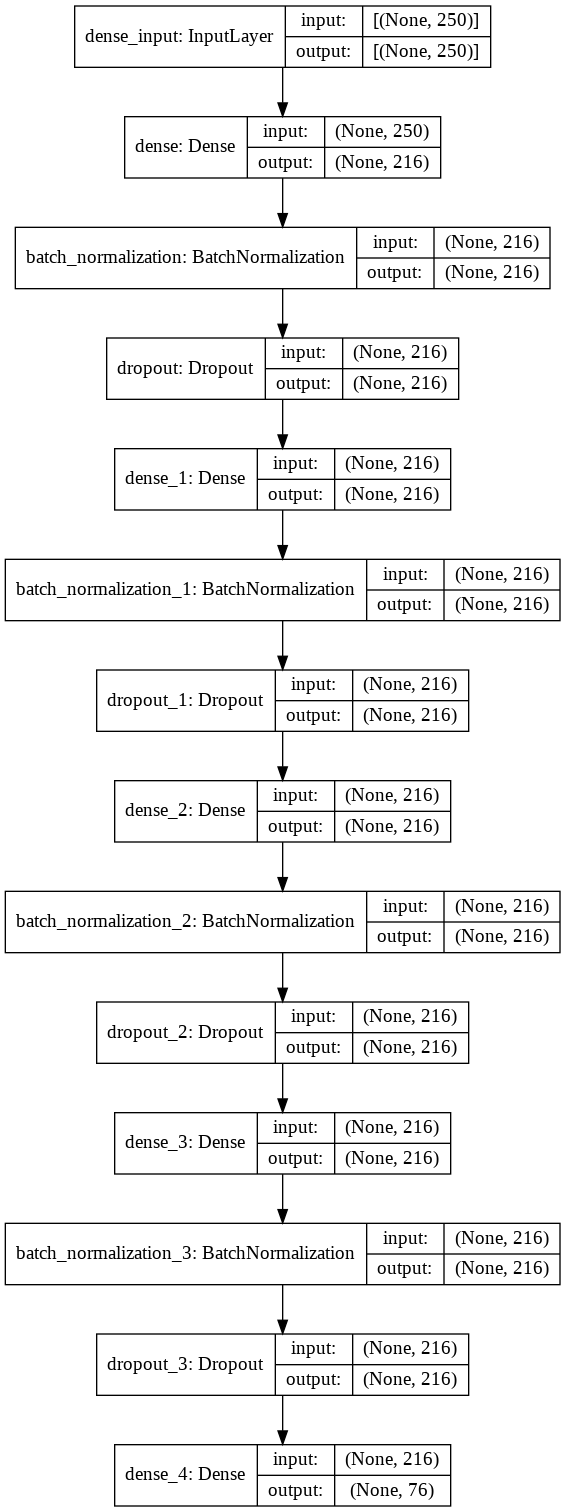

In [35]:
plot_model(model1, to_file='archi_FFN_inverse.png', show_shapes=True, show_layer_names=True,  rankdir="TB")

In [27]:
history1 = model1.fit(X_train, y_train,
                  epochs=1000,
                  batch_size=64,
                  validation_data=(X_val, y_val), callbacks=[callbacks])

Epoch 1/1000
54/54 [==============================] - 2s 15ms/step - loss: 3.4332 - r_square: -2.4386 - val_loss: 1.0686 - val_r_square: -0.0671
Epoch 2/1000
54/54 [==============================] - 0s 5ms/step - loss: 2.1635 - r_square: -1.1654 - val_loss: 1.0402 - val_r_square: -0.0391
Epoch 3/1000
54/54 [==============================] - 0s 6ms/step - loss: 1.6235 - r_square: -0.6314 - val_loss: 1.0119 - val_r_square: -0.0114
Epoch 4/1000
54/54 [==============================] - 0s 6ms/step - loss: 1.3625 - r_square: -0.3618 - val_loss: 0.9923 - val_r_square: 0.0083
Epoch 5/1000
54/54 [==============================] - 0s 6ms/step - loss: 1.2160 - r_square: -0.2206 - val_loss: 0.9864 - val_r_square: 0.0142
Epoch 6/1000
54/54 [==============================] - 0s 6ms/step - loss: 1.1340 - r_square: -0.1350 - val_loss: 0.9849 - val_r_square: 0.0157
Epoch 7/1000
54/54 [==============================] - 0s 6ms/step - loss: 1.0856 - r_square: -0.0845 - val_loss: 0.9806 - val_r_square: 0.

Text(0.5, 0, 'Epochs')

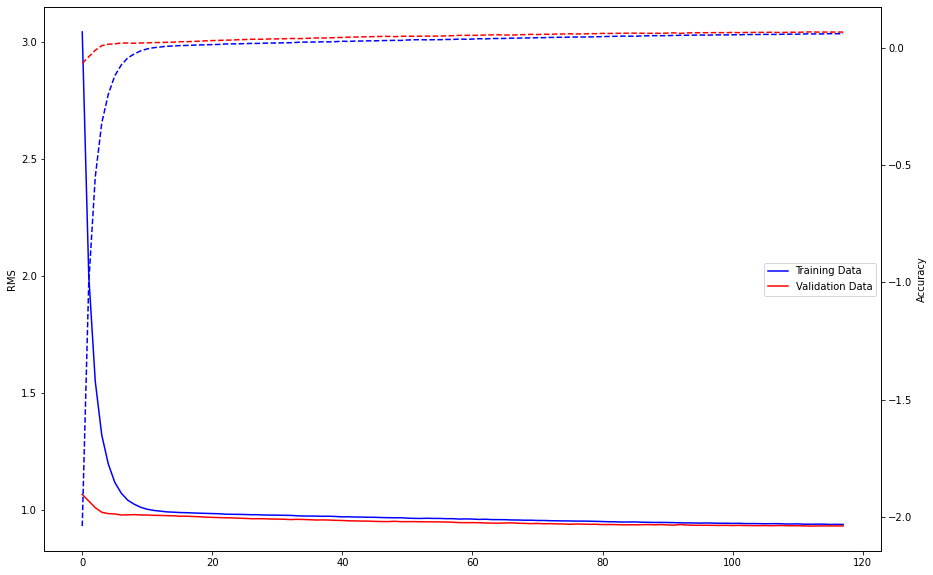

In [28]:
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(history1.history['loss'][:2000],label='Training Data',c='blue')
ax.plot(history1.history['val_loss'][:2000],label='Validation Data',c='red')
plt.ylabel('RMS')
plt.legend(loc='center right')

ax2 = ax.twinx()
ax2.plot(history1.history['r_square'][:2000],'--',c='blue')
ax2.plot(history1.history['val_r_square'][:2000],'--',c='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

In [29]:
Y_test = scaler_y.transform(Y_test)
X_test = scaler_x.transform(X_test)

In [30]:
# names = ['V_myo(um3)', 'N', 'g_D(um3_per_ms)', 'K_L(mM)', 'V_myo_uL(uL)',
#        'del_VL(mV)', 'tau_L(ms)', 'phi_L', 'g_t(microS)', 'K_RyR(mM)']

In [31]:
names= ['V_myo(um3)', 'V_SR(um3)', 'V_myo_uL(uL)', 'V_SR_uL(uL)',
       'i_NaK_max(uA)', 'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)',
       'Na_o(millimolar)', 'Ca_TRPN_Max(mM)', 'g_Na(microS)', 'g_t(microS)',
       'a_endo', 'b_endo', 'g_ss(microS)', 'g_K1(microS)', 'g_f(microS)',
       'f_Na', 'g_B_Na(microS)', 'g_B_Ca(microS)', 'g_B_K(microS)',
       'E_Ca(millivolt)', 'Ca_o(millimolar)', 'g_D(um3_per_ms)',
       'J_R(um3_per_ms)', 'J_L(um3_per_ms)', 'N', 'K_mNa(mM)', 'K_mCa(mM)',
       'eta', 'k_sat', 'g_NCX(mM_per_ms)', 'g_SERCA(mM_per_ms)', 'K_SERCA(mM)',
       'g_pCa(mM_per_ms)', 'K_mpCa(mM)', 'g_CaB(mM_per_mV_ms)',
       'g_SRl(per_ms)', 'k_CMDN(mM)', 'B_CMDN(mM)', 'k_on(per_mM_per_ms)',
       'k_Ref_off(per_ms)', 'gamma_trpn', 'alpha_0(per_ms)',
       'alpha_r1(per_ms)', 'alpha_r2(per_ms)', 'n_Rel', 'K_z', 'n_Hill',
       'Ca_50ref(mM)', 'z_p', 'beta_1', 'beta_0', 'T_ref(N_per_mm2)',
       'a in component Cross_Bridges', 'A_1', 'A_2', 'A_3', 'alpha_1(per_ms)',
       'alpha_2(per_ms)', 'alpha_3(per_ms)', 'V_L(mV)', 'del_VL(mV)', 'phi_L',
       't_L(ms)', 'tau_L(ms)', 'tau_R(ms)', 'phi_R', 'theta_R', 'K_RyR(mM)',
       'K_L(mM)', 'a', 'b', 'c', 'd', 'tau_s_ss']

In [32]:
pd.set_option('display.max_rows', 500)

In [33]:
results_df = pd.DataFrame()
ypred1 = model1.predict(X_test)

extra_results_df = pd.DataFrame([r2_score(Y_test[:,i],ypred1[:,i]) for i in range(len(names))],index=names,columns=['r2_score'])
results_df = pd.concat([results_df,extra_results_df],axis=1)
results_df

,r2_score
V_myo(um3),0.171782
V_SR(um3),-0.003704
V_myo_uL(uL),0.233926
V_SR_uL(uL),0.050195
i_NaK_max(uA),0.012477
K_m_K(mM),-0.003774
K_m_Na(mM),0.032901
K_o(millimolar),0.858056
Na_o(millimolar),0.443518
Ca_TRPN_Max(mM),0.063726


In [34]:
r2_score(Y_test, ypred1)

0.0645894756616289